In [2]:
import numpy as np
import pandas as pd
np.random.seed(0)
import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation,RepeatVector
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
import tensorflow as tf
from keras import backend as K
np.random.seed(1)

train and test is a panda data frame and 
**the structure of frame is as follows-:**


1.   1st column consist of data id or pharse id 
2.   2nd column consist of sentence id which is of no use
3.   3rd column consist of our data in string format
4.   4th cloumn comsist of sentiment review from 0 to 4 i.e our Y





In [19]:
#=================LOAD DATA==================================================
train = pd.read_csv("/content/drive/MyDrive/my projects/sentiment classification/data/train.tsv",sep='\t')
test = pd.read_csv("/content/drive/MyDrive/my projects/sentiment classification/data/test.tsv",sep='\t')

In [ ]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [20]:
X_train = list(train["Phrase"])
Y_train = list(train["Sentiment"]) 
X_test =  list(test["Phrase"])

In [ ]:
def create_vocabulary(X_train):
  vocabulary = set()
  max_len=0
  for sentence in X_train:
    words = sentence.lower().split()
    len_ = len(words)
    if len_>max_len:
      max_len=len_
    for word in words:
      vocabulary.add(word)
  return max_len,list(vocabulary)

In [ ]:
max_len,vocabulary=create_vocabulary(X_train)

In [ ]:
def word_index_creator(vocabulary):
  word_to_index = dict()
  for idx,word in enumerate(vocabulary):
    word_to_index[word] = idx
  return word_to_index

In [ ]:
word_to_index = word_index_creator(vocabulary)

In [ ]:
def sentences_to_indices(X, word_to_index, max_len):
  m=len(X)
  X_input = np.zeros((m,max_len))
  indices=[]
  keys = list(word_to_index.keys())
  for count,sentence in enumerate(X):
    words = sentence.lower().split()
    indices = [word_to_index[word] if (word in keys) else 0 for word in words  ]
    
            
    for i,idx in enumerate(indices):
      if i>=52:
        break
      X_input[count,i] = idx
      
    
    indices.clear()
  return X_input

In [ ]:
X_train = sentences_to_indices(X_train,word_to_index,max_len)

KeyboardInterrupt: ignored

In [ ]:
print(X_train.shape)

(156060, 52)


In [ ]:
def sentiment_movie(input_shape, word_to_index):
  vocab_size = len(word_to_index)
  sentence_input = Input(shape=input_shape,dtype='int32')
  embedding_layer = Embedding(input_dim=vocab_size,output_dim=300)
  embeddings = embedding_layer(sentence_input)
  X = LSTM(128,return_sequences=True)(embeddings)
  X= Dropout(0.5)(X)

  X = LSTM(128, return_sequences=False)(X)
    # Add dropout with a probability of 0.5
  X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
  X = Dense(5)(X)
    # Add a softmax activation
  X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
  model = Model(inputs=sentence_input, outputs=X)
    
    ### END CODE HERE ###
    
  return model

In [ ]:

model = sentiment_movie((max_len,), word_to_index)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 52, 300)           4959300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 52, 128)           219648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 52, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [ ]:
Y_train = np.array(Y_train).reshape(len(Y_train),1)

In [ ]:
Y_train = convert_to_one_hot(Y_train,5)


In [ ]:
print(Y_train.shape)

(156060, 5)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  Y_train,
                                                  test_size = 0.2,
                                                  stratify = Y_train)

In [ ]:
print(X_train.shape)

(124848, 52)


In [ ]:
num_epochs = 16

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs = num_epochs,
                    batch_size = 256,
                    verbose = 1)

Epoch 1/16
488/488 [==============================] - 40s 77ms/step - loss: 1.2345 - accuracy: 0.5179 - val_loss: 1.0268 - val_accuracy: 0.6091
Epoch 2/16
488/488 [==============================] - 36s 75ms/step - loss: 0.9075 - accuracy: 0.6441 - val_loss: 0.8498 - val_accuracy: 0.6587
Epoch 3/16
488/488 [==============================] - 36s 74ms/step - loss: 0.7748 - accuracy: 0.6930 - val_loss: 0.8216 - val_accuracy: 0.6665
Epoch 4/16
488/488 [==============================] - 37s 75ms/step - loss: 0.7147 - accuracy: 0.7143 - val_loss: 0.8226 - val_accuracy: 0.6719
Epoch 5/16
488/488 [==============================] - 36s 75ms/step - loss: 0.6625 - accuracy: 0.7342 - val_loss: 0.8135 - val_accuracy: 0.6748
Epoch 6/16
488/488 [==============================] - 36s 74ms/step - loss: 0.6342 - accuracy: 0.7423 - val_loss: 0.8266 - val_accuracy: 0.6724
Epoch 7/16
488/488 [==============================] - 36s 74ms/step - loss: 0.6024 - accuracy: 0.7541 - val_loss: 0.8510 - val_accuracy:

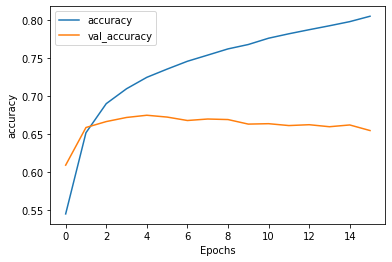

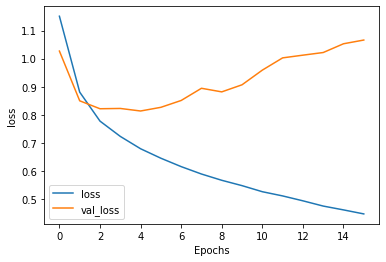

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

saving the model, word_to_index , vocabulary

In [ ]:
import pickle
model.save('/content/drive/MyDrive/my projects/sentiment classification/saved_model/sentiment_model.h5')

a_file = open("/content/drive/MyDrive/my projects/sentiment classification/saved_model/word_to_index.pkl","wb")
pickle.dump(word_to_index,a_file)
a_file.close()



In [ ]:
#===============saving the vocabulary==============================
from csv import  writer
with open("/content/drive/MyDrive/my projects/sentiment classification/saved_model/vocabulary.csv",'w') as file:
  WRITER=writer(file)
  WRITER.writerows(vocabulary)
  

In [ ]:
x_review = 'very bad movie'
words = x_review.split()
my_input=np.zeros((1,max_len))
indices = [word_to_index[word] for word in words]
for count,idx in enumerate(indices):
  my_input[0,count] = idx
print(my_input.shape)
print(np.argmax(model.predict(my_input)))
print((model.predict(my_input)).shape)

(1, 52)
0
(1, 5)


LOAD MOdel,vocabulary and word_to _index

In [3]:
model = keras.models.load_model('/content/drive/MyDrive/my projects/sentiment classification/saved_model/sentiment_model.h5')

In [4]:
import pickle
a_file = open("/content/drive/MyDrive/my projects/sentiment classification/saved_model/word_to_index.pkl","rb")
word_to_index=pickle.load(a_file)
a_file.close()

In [5]:
from csv import  reader
vocabulary=[]
with open("/content/drive/MyDrive/my projects/sentiment classification/saved_model/vocabulary.csv",'r') as file:
  READER=reader(file)
  for row in READER:
    vocabulary.append("".join(row))
  

In [58]:
import nltk
nltk.download('punkt')
import string
def create_input(sentence,word_to_index):
  sentence = sentence.lower()
  #=====below is just like words = sentence.split() but also do some good work
  words = nltk.wordpunct_tokenize(sentence)
  #========BELOW 2 LINES REMOVE PUNCTUATION FROM LIST========
  punc = string.punctuation
  words = [word for word in words if word not in punc]
  my_input=np.zeros((1,52))
  indices = []
  for word in words:
    if (word not in word_to_index.keys()):
      continue
    else:
      indices.append(word_to_index[word])
  for count,idx in enumerate(indices):
    my_input[0,count] = idx
  return my_input

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:

x_review = 'a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world'
my_input = create_input(x_review,word_to_index)
print(np.argmax(model.predict(my_input)))

2
